In [1]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Convolution2D
from tensorflow.keras.layers import MaxPooling2D
from tensorflow.keras.layers import Flatten

In [2]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [ ]:
!unzip '/content/drive/MyDrive/Flowers-Dataset.zip'

In [4]:
train_datagen = ImageDataGenerator(rescale=1./255,
                                   zoom_range=0.2,
                                   horizontal_flip=True)

In [5]:
test_datagen = ImageDataGenerator(rescale=1./255)

In [6]:
xtrain = train_datagen.flow_from_directory('/content/flowers',
                                           target_size=(64,64),
                                           class_mode='categorical',
                                           batch_size=100)

Found 4317 images belonging to 5 classes.


In [7]:
xtest = test_datagen.flow_from_directory('/content/flowers',
                                         target_size=(64,64),
                                         class_mode='categorical',
                                         batch_size=100)

Found 4317 images belonging to 5 classes.


**Create Model**

In [8]:
model = Sequential()

**Convolution Layer**

In [9]:
model.add(Convolution2D(32,(3,3),activation='relu',input_shape=(64,64,3)))

**MaxPooling**

In [10]:
model.add(MaxPooling2D(pool_size=(2,2)))

**Flatten**

In [11]:
model.add(Flatten())

**Dense Layer**

In [12]:
model.add(Dense(300,activation='relu')) #hiddenlayer 1
model.add(Dense(150,activation='relu')) #hiddenlayer 2

**Output**

In [13]:
model.add(Dense(5,activation='softmax'))

**Compile the model**

In [14]:
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

**Fit The Model**

In [16]:
model.fit(xtrain,steps_per_epoch=108,epochs=30,validation_data=xtest,validation_steps=27)

Epoch 1/30
 44/108 [===========>..................] - ETA: 42s - loss: 1.0821 - accuracy: 0.5724

108/108 [==============================] - 39s 358ms/step - loss: 1.0821 - accuracy: 0.5724 - val_loss: 1.0636 - val_accuracy: 0.5919


**Save The Model**

In [17]:
model.save('Flowers.h5')

**Test The Model**

In [18]:
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image
import numpy as np

In [19]:
img = image.load_img('/content/flowers/daisy/10559679065_50d2b16f6d.jpg',target_size=(64,64))

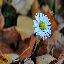

In [20]:
img

In [21]:
x=image.img_to_array(img)
x=np.expand_dims(x,axis=0)

In [22]:
pred_prob=model.predict(x)

1/1 [==============================] - 0s 102ms/step


In [23]:
class_name=["Daisy","Dandelion","Rose","Sunflower","Tulip"]

In [24]:
img = image.load_img('/content/flowers/rose/12238827553_cf427bfd51_n.jpg',target_size = (64,64))
x = image.img_to_array(img)
x = np.expand_dims(x,axis = 0)
pred = np.argmax(model.predict(x))
op = ['daisy','dandelion','rose','sunflower','tulip']
op[pred]

1/1 [==============================] - 0s 25ms/step


'rose'

In [26]:
img = image.load_img('/content/flowers/dandelion/10777398353_5a20bb218c.jpg',target_size = (64,64))
x = image.img_to_array(img)
x = np.expand_dims(x,axis = 0)
pred = np.argmax(model.predict(x))
op = ['daisy','dandelion','rose','sunflower','tulip']
op[pred]

1/1 [==============================] - 0s 25ms/step


'sunflower'